## Analyzing 911 calls 
### The data is available in Kaggle website.

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [114]:
# importing important libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
# reading the csv file:
df = pd.read_csv('911.csv',parse_dates=['timeStamp'])
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.8+ MB


In [117]:
# checking the first 5 rows of the dataset:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [118]:
# top 5 zipcodes for 911 calls:
df['zip'].value_counts().nlargest(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [119]:
# top 5 townships (twp) for 911 calls:
df['twp'].value_counts().nlargest(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [120]:
# how many unique titles are there?
df['title'].nunique()

110

In [121]:
### In the titles column the first word is the department. I try to create a new column for the department by splitting the full string:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [122]:
# The most 'reason' for 911 calls:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

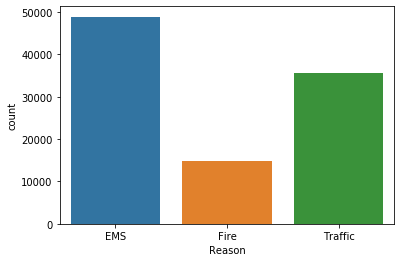

In [123]:
sns.countplot(df['Reason'])

Now I want to investigate the time column to find out how the time of day is related to the calls:
So I create three columns for hour, month and days of week:

In [233]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.day_name())

Text(0.5, 1.0, 'countplot of the Day of Week for different Reasons')

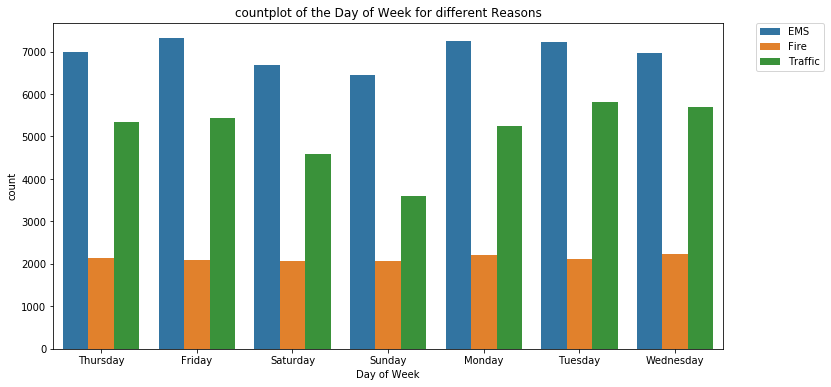

In [238]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Day of Week'],hue=df['Reason'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('countplot of the Day of Week for different Reasons')

Text(0.5, 1.0, 'countplot of the Hour for different Reasons')

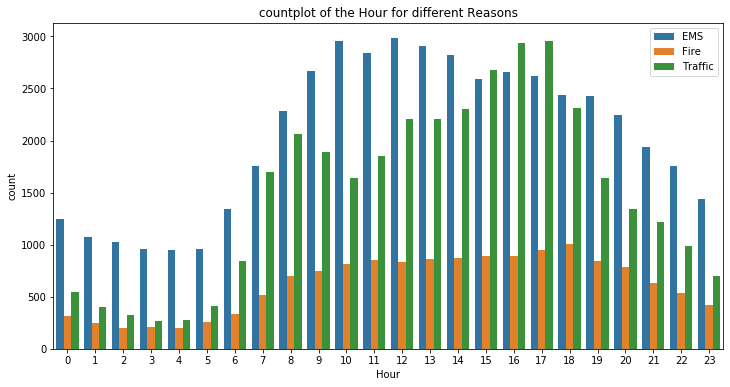

In [239]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Hour'],hue=df['Reason'])
plt.legend(loc='best')
plt.title('countplot of the Hour for different Reasons')

Text(0.5, 1.0, 'countplot of the month for different Reasons')

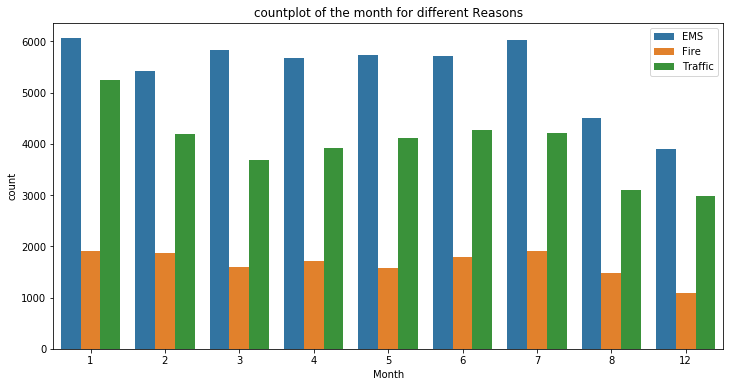

In [240]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Month'],hue=df['Reason'])
plt.legend(loc='best')
plt.title('countplot of the month for different Reasons')

### It is noticed that there are some missing months

In [241]:
df_groupby_month = df.groupby('Month').count()
df_groupby_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


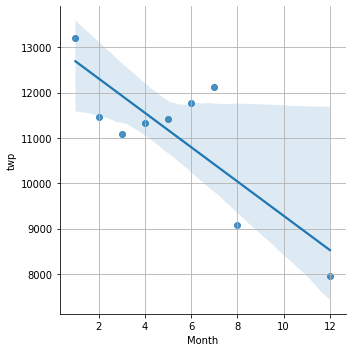

In [242]:
# We can create a linear fit on the number of calls per month:
sns.lmplot(x='Month',y='twp',data = df_groupby_month.reset_index())
plt.grid(True)

In [243]:
# Making column date: (splitting date from timeStamp)
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

Text(0, 0.5, 'Number of Calls')

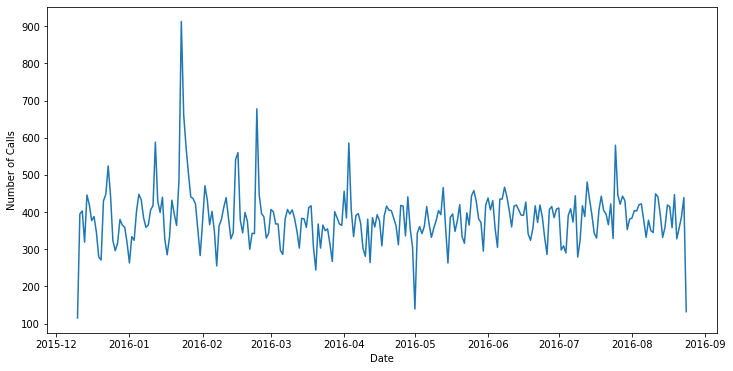

In [246]:
# frequency of calls during the year:
plt.figure(figsize=(12,6))
df_groupby_date = df.groupby('Date').count()['twp'].plot()
plt.xlabel('Date')
plt.ylabel('Number of Calls')

Now we recreate the plot above for every Reason:

Text(0, 0.5, 'Number of Calls')

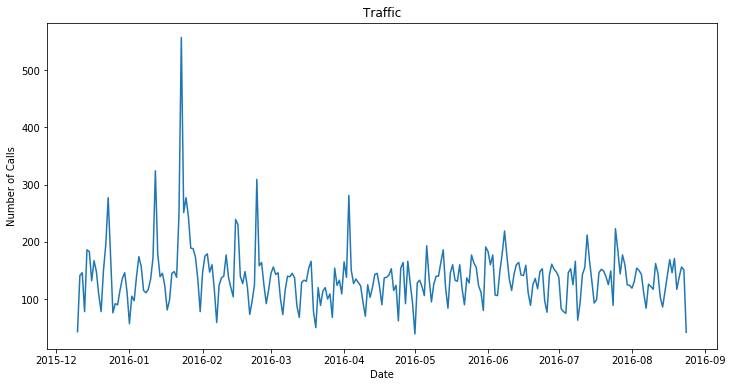

In [247]:
plt.figure(figsize=(12,6))
df_groupby_date = df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.xlabel('Date')
plt.ylabel('Number of Calls')

Text(0, 0.5, 'Number of Calls')

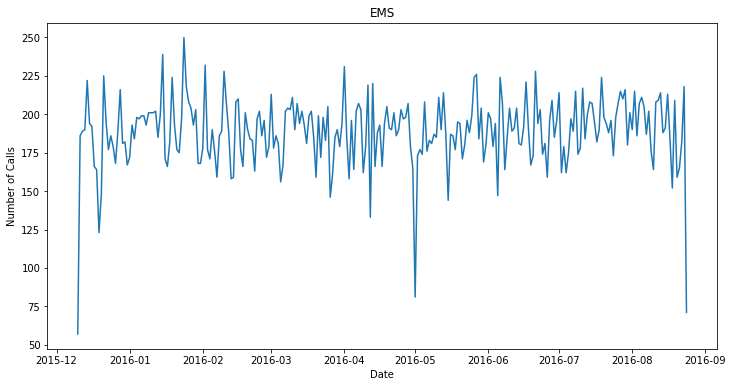

In [248]:
plt.figure(figsize=(12,6))
df_groupby_date = df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.xlabel('Date')
plt.ylabel('Number of Calls')

Text(0, 0.5, 'Number of Calls')

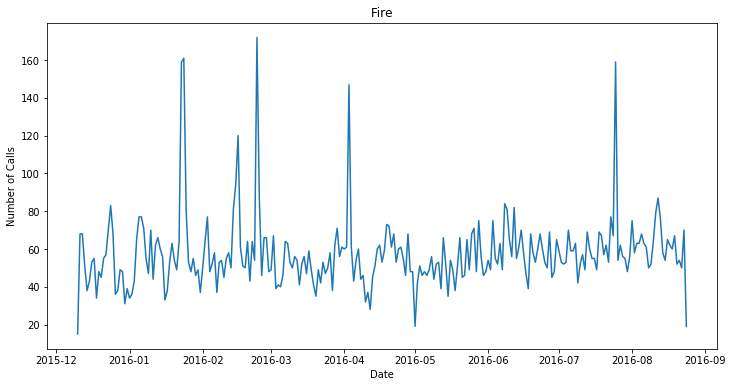

In [250]:
plt.figure(figsize=(12,6))
df_groupby_date = df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.xlabel('Date')
plt.ylabel('Number of Calls')

 ### Now I want to create some heatmaps according to hours and weekday

In [252]:
df_groupby_Weekday_Hour = df.groupby(['Day of Week','Hour']).count()['twp'].unstack(level=-1)

In [253]:
df_groupby_Weekday_Hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Monday,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Saturday,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sunday,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

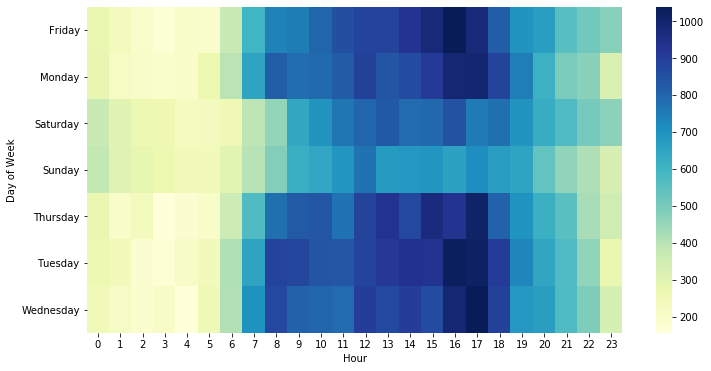

In [254]:
plt.figure(figsize=(12,6))
sns.heatmap(df_groupby_Weekday_Hour,cmap = 'YlGnBu',)
plt.yticks(rotation=0)

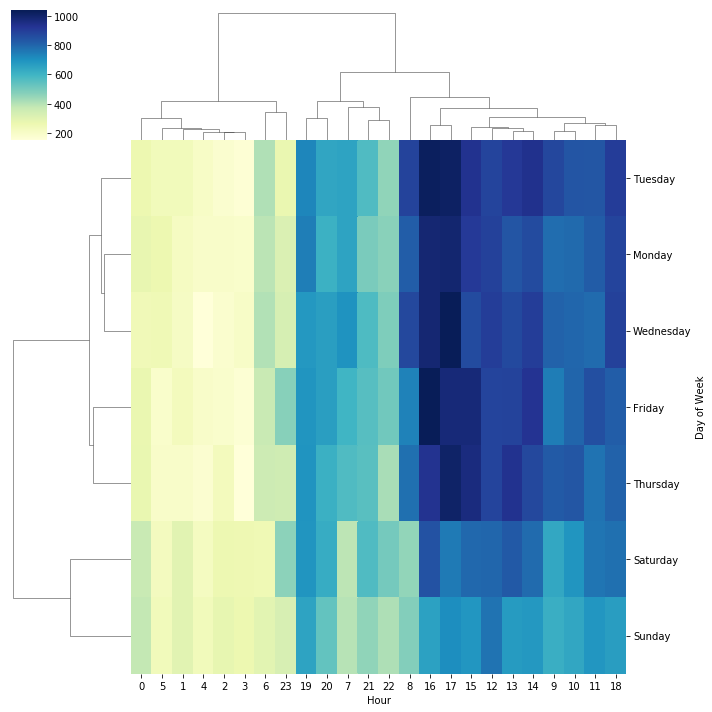

In [255]:
sns.clustermap(df_groupby_Weekday_Hour,cmap='YlGnBu')

### Now we repeat these steps for Month column:

In [256]:
df_groupby_Weekday_Month = df.groupby(['Day of Week','Month']).count()['twp'].unstack(level=-1)
df_groupby_Weekday_Month.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Friday,1970,1581,1523,1958,1730,1649,2045,1310,1064
Monday,1727,1964,1533,1597,1779,1617,1692,1509,1256
Saturday,2290,1440,1264,1732,1444,1388,1695,1099,978
Sunday,1960,1229,1100,1488,1422,1331,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1227,1265


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

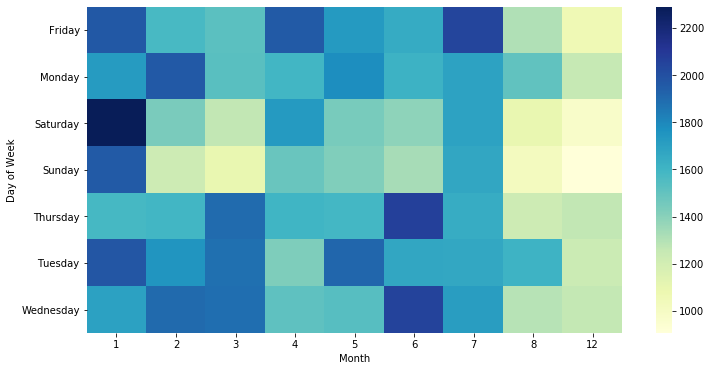

In [257]:
plt.figure(figsize=(12,6))
sns.heatmap(df_groupby_Weekday_Month,cmap = 'YlGnBu',)
plt.yticks(rotation=0)

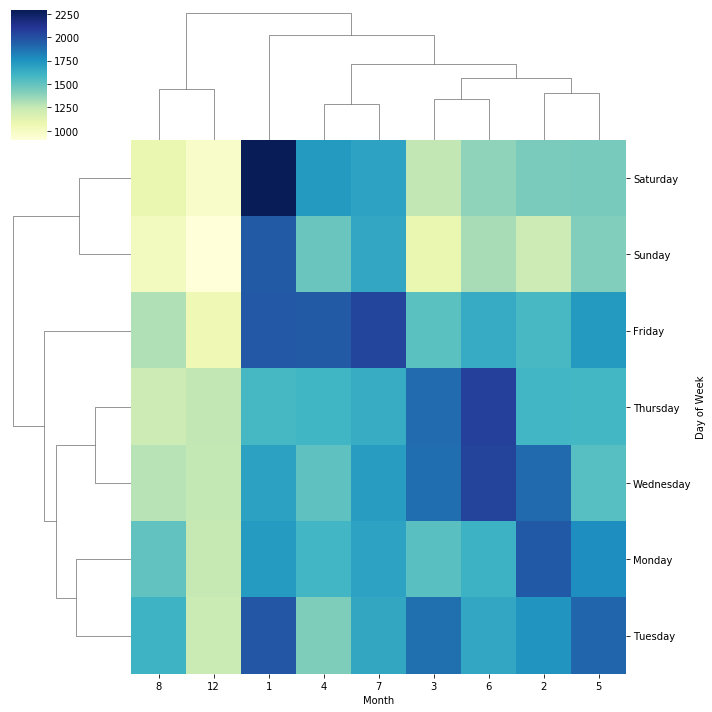

In [258]:
sns.clustermap(df_groupby_Weekday_Month,cmap='YlGnBu')